<a href="https://colab.research.google.com/github/Husayn01/Machine-Learning-Specialization/blob/main/Student_score_Prediction_with_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

In [32]:
data = {
    'Hours': [2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7,
              7.7, 5.9, 4.5, 3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4],
    'Scores': [21, 47, 27, 75, 30, 20, 88, 60, 81, 25,
               85, 62, 41, 42, 17, 95, 30, 24, 67, 69]
}
df = pd.DataFrame(data)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [33]:
df.describe()

,Hours,Scores
count,20.000000,20.000000
mean,4.965000,50.300000
std,2.663451,25.941432
min,1.100000,17.000000
25%,2.650000,26.500000
50%,4.800000,44.500000
75%,7.475000,70.500000
max,9.200000,95.000000


In [34]:
px.scatter(df, x='Hours', y='Scores')

In [35]:
px.histogram(df, x='Scores', y='Hours',)

In [36]:
correlation = df.corr()
correlation

,Hours,Scores
Hours,1.000000,0.977474
Scores,0.977474,1.000000


In [37]:
px.imshow(correlation, text_auto=True, color_continuous_scale='RdBu')

In [38]:
x_train = df.Hours
y_train = df.Scores
def linear_model(x, w, b):
    return w * x + b

In [40]:
y_pred = linear_model(x_train,9, 3)
y_pred
df['Predicted Scores'] = y_pred
df

,Hours,Scores,Predicted Scores
0,2.5,21,25.5
1,5.1,47,48.9
2,3.2,27,31.8
3,8.5,75,79.5
4,3.5,30,34.5
5,1.5,20,16.5
6,9.2,88,85.8
7,5.5,60,52.5
8,8.3,81,77.7
9,2.7,25,27.3


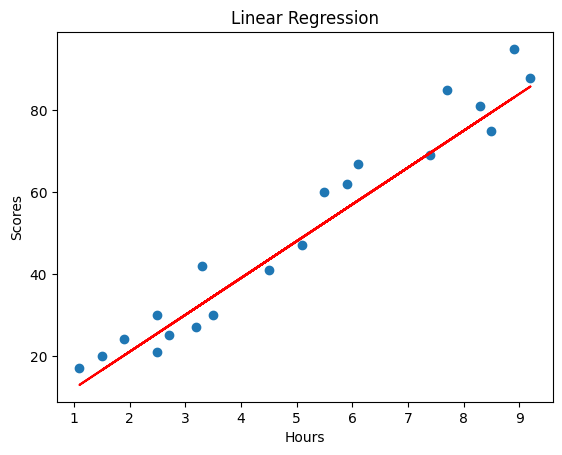

In [41]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred, color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Linear Regression')
plt.show()

In [44]:
def try_model(w,b):
  y_pred = linear_model(x_train,w,b)
  plt.scatter(x_train, y_train)
  plt.plot(x_train, y_pred, color='red')

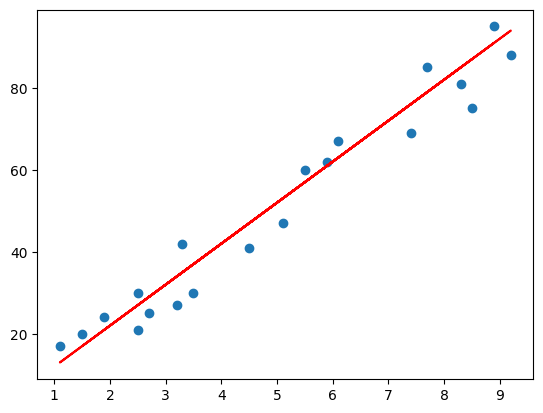

In [45]:
try_model(10,2)

In [46]:
def compute_cost(x,y, w, b):
  cost_sum = 0
  m = len(x)
  for i in range(m):
    f_wb = w * x[i] + b
    cost = (f_wb - y[i]) ** 2
    cost_sum += cost
  total_cost = (1 / (2 * m) * cost_sum)
  return total_cost

In [47]:
compute_cost(x_train, y_train, 9, 3)

np.float64(18.570249999999998)

In [53]:
def train(x, y, w_init, b_init, alpha, iterations):
    w, b = w_init, b_init
    m = len(x)

    for _ in range(iterations):
        dj_dw = 0
        dj_db = 0
        for i in range(m):
            f_wb = w * x[i] + b
            dj_dw += (f_wb - y[i]) * x[i]
            dj_db += (f_wb - y[i])
        dj_dw /= m
        dj_db /= m

        w -= alpha * dj_dw
        b -= alpha * dj_db

    return w, b


In [55]:
train(x_train, y_train, 0, 0, 0.001, 1000)

(np.float64(9.711242194761661), np.float64(1.8326727999511878))

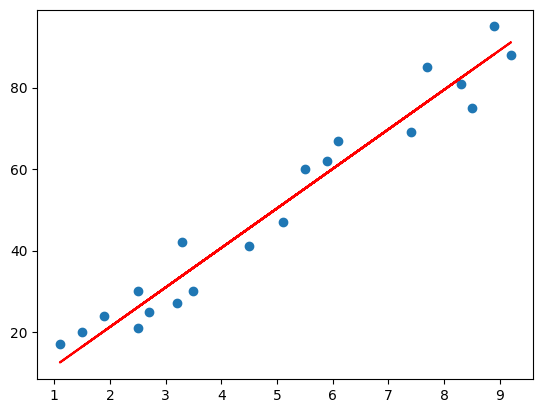

In [61]:
try_model(9.7, 1.85)

In [60]:
compute_cost(x_train, y_train, 9.7, 1.85)

np.float64(14.389247499999994)